In [38]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib
import pylatexenc
import math

In [39]:
%matplotlib inline

In [40]:
def getBVCircuit(number):
    circuit = QuantumCircuit(len(number)+1,len(number))
    circuit.h([i for i in range(len(number))])
    circuit.x(len(number))
    circuit.h(len(number))
    circuit.barrier([i for i in range(len(number))])
    for index,val in enumerate(number[::-1]):
        if val=='1':
            circuit.cx(index,len(number))
    circuit.barrier()
    circuit.h([i for i in range(len(number))])
    circuit.measure([i for i in range(len(number))],[i for i in range(len(number))])
    return circuit

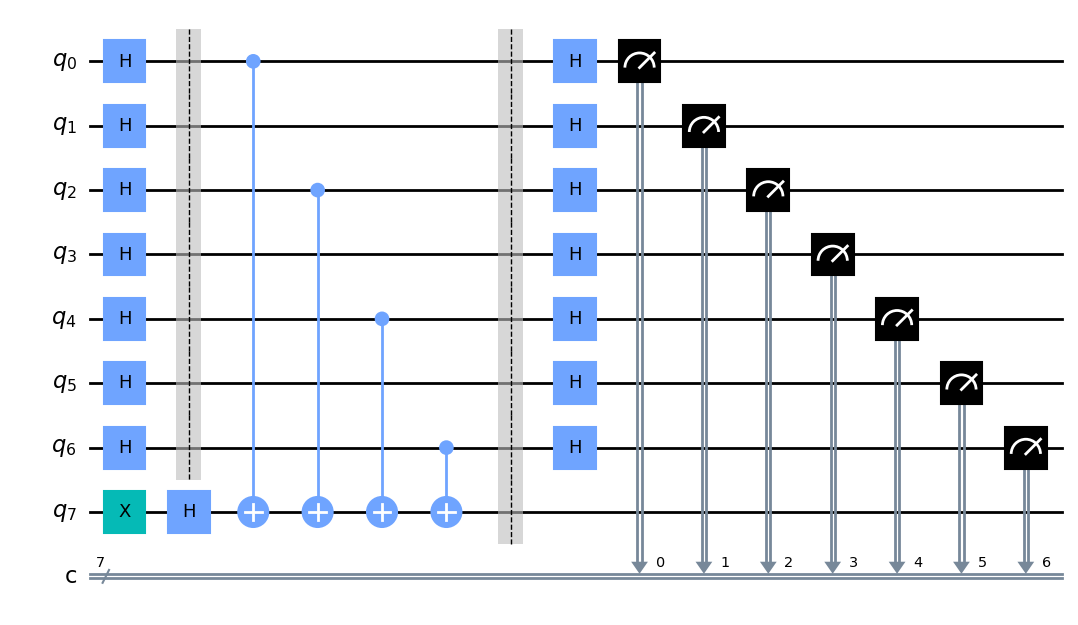

In [41]:
output_circuit=getBVCircuit("1010101")
output_circuit.draw(output='mpl')

In [42]:
def guessNumber(number, simulator='qasm_simulator'):
    circuit=getBVCircuit(number)
    simulator = Aer.get_backend(simulator)
    result=execute(circuit,backend=simulator,shots=1).result()
    result=result.get_counts()
    return list(result.keys())[0]

In [43]:
number=input("Give me a binary number: ")
print(f"Guessing the number... \n Your number is: {guessNumber(number)}")

Guessing the number... 
 Your number is: 1010111110111101
